In [1]:
import pandas as pd
import numpy as np

In [2]:
# tmp = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')
# tmp_2 = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')

In [3]:
# tmp_2.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)

In [4]:
# tmp.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)

In [5]:
# df = pd.concat([tmp, tmp_2])

In [6]:
# X = df.loc[:, df.columns!='Personality (Class label)']

In [7]:
# y = df.loc[:, df.columns=='Personality (Class label)']

In [8]:
# male_df = df[df['Gender'] == 'Male']

In [9]:
# female_df = df[df['Gender'] == 'Female']

In [10]:
# # getting all the columns
# cols = set(male_df.columns)
 
# # removing the desired column
# cols.remove('Personality (Class label)')
# cols.remove('Gender')
# cols = list(cols)
# X_male = male_df[cols]
# y_male = male_df.loc[:, male_df.columns=='Personality (Class label)']

In [11]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_male, y_male,
#                                                     stratify=y_male, 
#                                                     test_size=0.30)

In [12]:
from sklearn.model_selection import train_test_split

def df_load_and_split(gender='male'):
    tmp = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')
    tmp.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)
    tmp_2 = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')
    tmp_2.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)
    df = pd.concat([tmp, tmp_2])
    if gender == 'male':
        df = df[df['Gender'] == 'Male']
    else:
        df = df[df['Gender'] == 'Female']
    cols = set(df.columns)
    cols.remove('Personality (Class label)')
    cols.remove('Gender')
    cols = list(cols)
    X = df[cols]
    y = df.loc[:, df.columns=='Personality (Class label)']
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        stratify=y, 
                                                        test_size=0.30)
    return (X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = df_load_and_split('male')

In [13]:
print(len(X_train))
print(len(y_train))

222
222


In [14]:
y_train

,Personality (Class label)
127,responsible
27,dependable
23,extraverted
241,serious
151,lively
...,...
118,serious
186,serious
80,serious
220,lively


In [15]:
tmp = X_train 
tmp['Personality (Class label)'] = list(y_train['Personality (Class label)'])

tmp_2 = X_test 
tmp_2['Personality (Class label)'] = list(y_test['Personality (Class label)'])

print(len(tmp))
print(len(tmp_2))
tmp = pd.concat([tmp, tmp_2])
tmp

222
96


,openness,extraversion,conscientiousness,Age,neuroticism,agreeableness,Personality (Class label)
127,5,6,3,19,5,7,responsible
27,6,4,2,22,8,6,dependable
23,6,3,5,19,6,1,extraverted
241,2,6,3,26,5,6,serious
151,6,4,6,20,1,4,lively
...,...,...,...,...,...,...,...
189,5,5,2,21,5,7,serious
69,3,5,5,18,3,7,serious
76,4,6,5,20,4,7,serious
186,4,3,6,18,3,6,serious


In [16]:
class_counts = tmp['Personality (Class label)'].value_counts()
min_class = class_counts.idxmin()
min_count = class_counts.min()

balanced_df = pd.concat([
    tmp[tmp['Personality (Class label)'] == min_class],
    tmp[tmp['Personality (Class label)'] != min_class].sample(min_count)
], axis=0)

balanced_df

,openness,extraversion,conscientiousness,Age,neuroticism,agreeableness,Personality (Class label)
27,6,4,2,22,8,6,dependable
263,6,4,2,22,2,4,dependable
162,4,6,2,23,3,6,dependable
134,6,4,7,19,7,4,dependable
311,2,7,8,18,5,3,dependable
263,6,4,2,22,2,4,dependable
311,2,7,8,18,5,3,dependable
104,5,4,4,19,5,6,dependable
27,6,4,2,22,8,6,dependable
104,5,4,4,19,5,6,dependable


In [17]:
# tmp = X_train 
# # tmp['Personality (Class label)'] = list(y_train['Personality (Class label)'])

# tmp_2 = X_test 
# # tmp_2['Personality (Class label)'] = list(y_test['Personality (Class label)'])

tmp_X = pd.concat([X_train, X_test])
tmp_y = pd.concat([y_train['Personality (Class label)'], y_test['Personality (Class label)']])

print(len(tmp_X))
print(len(tmp_y))

318
318


In [18]:
tmp_y

127    responsible
27      dependable
23     extraverted
241        serious
151         lively
          ...     
189        serious
69         serious
76         serious
186        serious
215     dependable
Name: Personality (Class label), Length: 318, dtype: object

In [19]:
print(tmp_y.shape)
print(type(tmp_y))
tmp_y = tmp_y.to_frame()
tmp_y

(318,)
<class 'pandas.core.series.Series'>


,Personality (Class label)
127,responsible
27,dependable
23,extraverted
241,serious
151,lively
...,...
189,serious
69,serious
76,serious
186,serious


In [20]:
print(tmp_y.iloc[0])
print(tmp_y.iloc[1])

Personality (Class label)    responsible
Name: 127, dtype: object
Personality (Class label)    dependable
Name: 27, dtype: object


In [21]:
# tmp_y

In [22]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(tmp_y).toarray())  # y_train works, need to convert temp_y to y_train
# final_df = df.join(encoder_df)
encoder_df.columns = encoder.categories_

encoder_df

,dependable,extraverted,lively,responsible,serious
0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
313,0.0,0.0,0.0,0.0,1.0
314,0.0,0.0,0.0,0.0,1.0
315,0.0,0.0,0.0,0.0,1.0
316,0.0,0.0,0.0,0.0,1.0


In [23]:
tmp_y_enc = encoder_df
tmp_y_enc

,dependable,extraverted,lively,responsible,serious
0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
313,0.0,0.0,0.0,0.0,1.0
314,0.0,0.0,0.0,0.0,1.0
315,0.0,0.0,0.0,0.0,1.0
316,0.0,0.0,0.0,0.0,1.0


In [24]:
# help(sm.fit_resample)
tmp_X.columns

Index(['openness', 'extraversion', 'conscientiousness', 'Age', 'neuroticism',
       'agreeableness', 'Personality (Class label)'],
      dtype='object')

In [25]:
# np.ravel(tmp_y_enc)
# tmp_X
# type(tmp_X)
tmp_X = tmp_X.drop('Personality (Class label)', axis=1)
tmp_X

,openness,extraversion,conscientiousness,Age,neuroticism,agreeableness
127,5,6,3,19,5,7
27,6,4,2,22,8,6
23,6,3,5,19,6,1
241,2,6,3,26,5,6
151,6,4,6,20,1,4
...,...,...,...,...,...,...
189,5,5,2,21,5,7
69,3,5,5,18,3,7
76,4,6,5,20,4,7
186,4,3,6,18,3,6


In [26]:
print(len(tmp_X))
print(len(tmp_y_enc)*5)

318
1590


In [27]:
# tmp = X_train 
# # tmp['Personality (Class label)'] = list(y_train['Personality (Class label)'])

# tmp_2 = X_test 
# # tmp_2['Personality (Class label)'] = list(y_test['Personality (Class label)'])

tmp_X = pd.concat([X_train, X_test])
tmp_y = pd.concat([y_train['Personality (Class label)'], y_test['Personality (Class label)']])

print(len(tmp_X))
print(len(tmp_y))

318
318


In [28]:
tmp_y = tmp_X['Personality (Class label)']
tmp_y = pd.DataFrame({'Personality (Class label)': tmp_y})
type(tmp_y)
tmp_y

,Personality (Class label)
127,responsible
27,dependable
23,extraverted
241,serious
151,lively
...,...
189,serious
69,serious
76,serious
186,serious


In [29]:
# np.array(tmp_y.values.tolist())

In [30]:
# Eita lage nai eikhane
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Create an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit the encoder on the column you want to encode
encoder.fit(tmp_y)

# Transform the column
# df['A'] = 
encoder.transform(tmp_y)[:10]

# View the resulting dataframe
# print(df)

array([[3.],
       [0.],
       [1.],
       [4.],
       [2.],
       [4.],
       [4.],
       [2.],
       [4.],
       [4.]])

In [31]:
encoder.inverse_transform(encoder.transform(tmp_y)[:10])

array([['responsible'],
       ['dependable'],
       ['extraverted'],
       ['serious'],
       ['lively'],
       ['serious'],
       ['serious'],
       ['lively'],
       ['serious'],
       ['serious']], dtype=object)

In [32]:
tmp_X = tmp_X.drop('Personality (Class label)', axis=1)

In [33]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(tmp_X, np.ravel(tmp_y))

df_res = pd.DataFrame(X_res)
df_res['Personality'] = y_res

df_res

,openness,extraversion,conscientiousness,Age,neuroticism,agreeableness,Personality
0,5,6,3,19,5,7,responsible
1,6,4,2,22,8,6,dependable
2,6,3,5,19,6,1,extraverted
3,2,6,3,26,5,6,serious
4,6,4,6,20,1,4,lively
...,...,...,...,...,...,...,...
1015,5,6,3,19,5,6,responsible
1016,3,2,4,18,4,4,responsible
1017,4,4,3,19,6,5,responsible
1018,3,3,3,20,5,4,responsible


In [34]:
df_res['Personality'].value_counts()

responsible    204
dependable     204
extraverted    204
serious        204
lively         204
Name: Personality, dtype: int64

In [35]:
tmp_X = df_res.drop('Personality', axis=1)
tmp_X

,openness,extraversion,conscientiousness,Age,neuroticism,agreeableness
0,5,6,3,19,5,7
1,6,4,2,22,8,6
2,6,3,5,19,6,1
3,2,6,3,26,5,6
4,6,4,6,20,1,4
...,...,...,...,...,...,...
1015,5,6,3,19,5,6
1016,3,2,4,18,4,4
1017,4,4,3,19,6,5
1018,3,3,3,20,5,4


In [36]:
tmp_y = df_res['Personality']
tmp_y = pd.DataFrame({'Personality': tmp_y})
type(tmp_y)
tmp_y

,Personality
0,responsible
1,dependable
2,extraverted
3,serious
4,lively
...,...
1015,responsible
1016,responsible
1017,responsible
1018,responsible


In [37]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(tmp_y).toarray())  # y_train works, need to convert temp_y to y_train
# final_df = df.join(encoder_df)
encoder_df.columns = encoder.categories_

encoder_df

,dependable,extraverted,lively,responsible,serious
0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
1015,0.0,0.0,0.0,1.0,0.0
1016,0.0,0.0,0.0,1.0,0.0
1017,0.0,0.0,0.0,1.0,0.0
1018,0.0,0.0,0.0,1.0,0.0


In [38]:
tmp_y_enc = encoder_df
tmp_y_enc

,dependable,extraverted,lively,responsible,serious
0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
1015,0.0,0.0,0.0,1.0,0.0
1016,0.0,0.0,0.0,1.0,0.0
1017,0.0,0.0,0.0,1.0,0.0
1018,0.0,0.0,0.0,1.0,0.0


In [39]:
encoder.inverse_transform(tmp_y_enc)

array([['responsible'],
       ['dependable'],
       ['extraverted'],
       ...,
       ['responsible'],
       ['responsible'],
       ['responsible']], dtype=object)

In [40]:
# This is for deep learning - one hot encoded y values
X_train, X_test, y_train, y_test = train_test_split(tmp_X, tmp_y_enc,
                                                        stratify=tmp_y_enc, 
                                                        test_size=0.30)

In [41]:
X_train

,openness,extraversion,conscientiousness,Age,neuroticism,agreeableness
323,2,7,8,18,5,3
793,5,1,5,17,4,6
104,6,6,6,18,3,6
223,7,5,7,18,5,5
615,6,4,4,19,6,2
...,...,...,...,...,...,...
574,5,5,5,19,7,4
828,4,4,4,18,4,4
583,5,4,5,18,7,4
899,6,6,4,18,5,5


In [42]:
y_train

,dependable,extraverted,lively,responsible,serious
323,1.0,0.0,0.0,0.0,0.0
793,0.0,0.0,1.0,0.0,0.0
104,0.0,0.0,0.0,0.0,1.0
223,0.0,0.0,0.0,0.0,1.0
615,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
574,0.0,1.0,0.0,0.0,0.0
828,0.0,0.0,1.0,0.0,0.0
583,0.0,1.0,0.0,0.0,0.0
899,0.0,0.0,0.0,1.0,0.0


In [43]:
# This is for deep learning - one hot encoded y values
X_train, X_test, y_train, y_test = train_test_split(tmp_X, tmp_y,
                                                        stratify=tmp_y, 
                                                        test_size=0.30)

In [44]:
X_train

,openness,extraversion,conscientiousness,Age,neuroticism,agreeableness
462,4,6,3,23,3,5
382,5,4,2,22,2,4
797,7,1,7,17,5,5
570,4,4,3,17,6,4
339,5,4,6,20,6,4
...,...,...,...,...,...,...
957,3,1,4,18,4,3
855,3,1,4,18,4,3
854,3,3,3,22,3,4
606,4,4,3,17,6,5


In [45]:
y_train

,Personality
462,dependable
382,dependable
797,lively
570,extraverted
339,dependable
...,...
957,responsible
855,responsible
854,responsible
606,extraverted


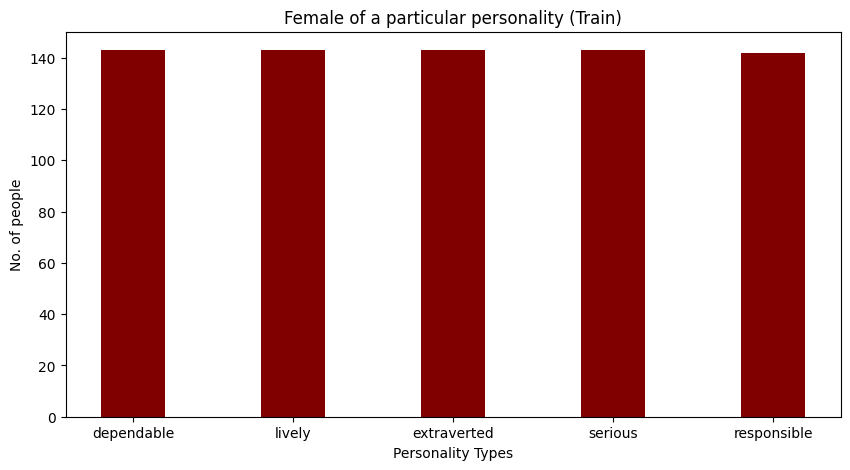

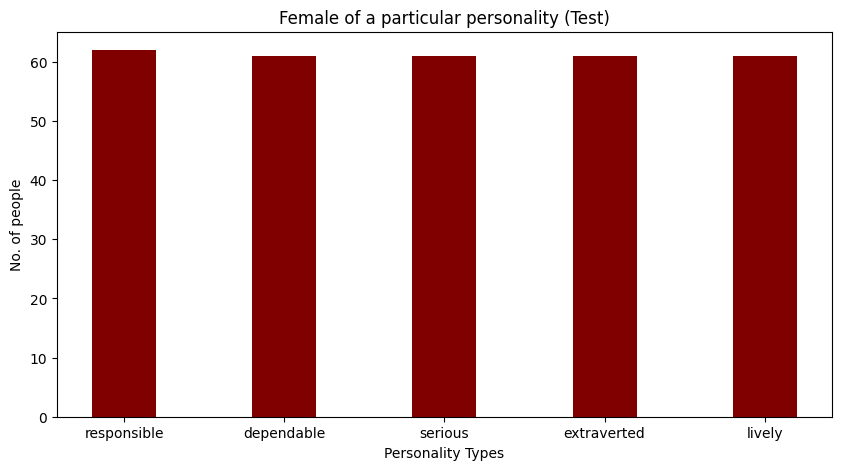

In [46]:
def draw_bars(X_train, X_test, y_train, y_test, gender='male'):
    import matplotlib.pyplot as plt
    for i in y_train, y_test:
        tmp = i.value_counts() # .count()
        fig = plt.figure(figsize = (10, 5))
        # creating the bar plot
        plt.bar(list(i['Personality'].value_counts()._get_axis(axis=0)),
                list(i['Personality'].value_counts()), color ='maroon',
                width = 0.4)

        plt.xlabel("Personality Types")
        plt.ylabel("No. of people")

        if len(i) == len(y_train):
            tmp = gender.title() + " of a particular personality (Train)"
            plt.title(tmp)
        else:
            tmp = gender.title() + " of a particular personality (Test)"
            plt.title(tmp)

        plt.show()
        
draw_bars(X_train, X_test, y_train, y_test, 'female')

In [47]:
X_train

,openness,extraversion,conscientiousness,Age,neuroticism,agreeableness
462,4,6,3,23,3,5
382,5,4,2,22,2,4
797,7,1,7,17,5,5
570,4,4,3,17,6,4
339,5,4,6,20,6,4
...,...,...,...,...,...,...
957,3,1,4,18,4,3
855,3,1,4,18,4,3
854,3,3,3,22,3,4
606,4,4,3,17,6,5


In [48]:
y_train

,Personality
462,dependable
382,dependable
797,lively
570,extraverted
339,dependable
...,...
957,responsible
855,responsible
854,responsible
606,extraverted


In [49]:
y_train.iloc[0]

Personality    dependable
Name: 462, dtype: object

In [50]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(y_train):
    #creating instance of one-hot-encoder
    encoder = OneHotEncoder(handle_unknown='ignore')

    #perform one-hot encoding on 'team' column 
    encoder_df = pd.DataFrame(encoder.fit_transform(y_train).toarray())

    #merge one-hot encoded columns back with original DataFrame
    # final_df = df.join(encoder_df)

    #view final df
    encoder_df.columns = encoder.categories_

    return encoder_df

one_hot_encode(y_train)

,dependable,extraverted,lively,responsible,serious
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
709,0.0,0.0,0.0,1.0,0.0
710,0.0,0.0,0.0,1.0,0.0
711,0.0,0.0,0.0,1.0,0.0
712,0.0,1.0,0.0,0.0,0.0


In [51]:
def get_val(row, data):
    tmp = []
    for i in one_hot_encode(data).columns:
        tmp.append(str(i[0]))
    for i in range(len(row)):
        if row[i]==1:
            return tmp[i]
            
get_val([0, 0, 0, 1.0, 0], y_test)

'responsible'

In [52]:
y_train

,Personality
462,dependable
382,dependable
797,lively
570,extraverted
339,dependable
...,...
957,responsible
855,responsible
854,responsible
606,extraverted


In [53]:
# y_train = one_hot_encode(y_train)

In [54]:
# y_test = one_hot_encode(y_test)

In [55]:
# # X = X_train + X_test
# X = pd.concat([X_train, X_test])
# # y = y_train + y_test
# y = pd.concat([y_train, y_test])

# X.isna().sum()

In [56]:
# y['Personality (Class label)']

In [57]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y_enc = enc.fit_transform(y_train)

In [58]:
# X_train   # I am now here 

In [59]:
# # X = X_train + X_test
# X = pd.concat([X_train, X_test])
# # y = y_train + y_test
# y = pd.concat([y_train, y_test])

In [60]:
print(len(X_train))
print(len(X_test))
print(len(pd.concat([X_train, X_test])))

714
306
1020


In [61]:
print(len(y_train))
print(len(y_test))
print(len(pd.concat([y_train, y_test])))

714
306
1020


In [62]:
# y_train
# y_pred
type(y_train)

pandas.core.frame.DataFrame

In [63]:
X_train

,openness,extraversion,conscientiousness,Age,neuroticism,agreeableness
462,4,6,3,23,3,5
382,5,4,2,22,2,4
797,7,1,7,17,5,5
570,4,4,3,17,6,4
339,5,4,6,20,6,4
...,...,...,...,...,...,...
957,3,1,4,18,4,3
855,3,1,4,18,4,3
854,3,3,3,22,3,4
606,4,4,3,17,6,5


In [64]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras

# y = pd.concat([y_train, y_test])

# Convert y_train to numerical labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

2023-05-06 20:17:41.651889: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-06 20:18:09.286268: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-05-06 20:18:09.286522: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-05-06 20:18:09.286537: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [65]:
print(len(y_train_encoded))
print(len(y_test_encoded))

714
306


In [66]:

# Split the data into training and validation sets
# x_train, x_val, y_train, y_val = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(500, activation='relu', input_shape=(6,)),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

# Evaluate the model on the test set
# y_test_encoded = le.transform(y_test)
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

2023-05-06 20:18:34.010518: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2023-05-06 20:18:34.010572: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Scarlet
2023-05-06 20:18:34.010584: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Scarlet
2023-05-06 20:18:34.010733: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 510.108.3
2023-05-06 20:18:34.010769: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 525.105.17
2023-05-06 20:18:34.010780: E tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 525.105.17 does not match DSO version 510.108.3 -- cannot find working devices in this configuration
2023-05-06 20:

Epoch 1/10
23/23 [==============================] - 3s 25ms/step - loss: 0.0000e+00 - accuracy: 0.1961 - val_loss: 0.0000e+00 - val_accuracy: 0.1993
Epoch 2/10
23/23 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.2003 - val_loss: 0.0000e+00 - val_accuracy: 0.1993
Epoch 3/10
23/23 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.2003 - val_loss: 0.0000e+00 - val_accuracy: 0.1993
Epoch 4/10
23/23 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.2003 - val_loss: 0.0000e+00 - val_accuracy: 0.1993
Epoch 5/10
23/23 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.2003 - val_loss: 0.0000e+00 - val_accuracy: 0.1993
Epoch 6/10
23/23 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.2003 - val_loss: 0.0000e+00 - val_accuracy: 0.1993
Epoch 7/10
23/23 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.2003 - v

In [67]:
model.evaluate(X_test, y_test_encoded)

10/10 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1993


[0.0, 0.1993464082479477]

In [68]:
X_test

,openness,extraversion,conscientiousness,Age,neuroticism,agreeableness
427,7,6,7,18,2,3
440,6,5,2,18,6,6
353,5,4,2,22,2,4
215,6,7,6,17,5,2
567,6,4,3,23,7,1
...,...,...,...,...,...,...
634,6,3,5,19,6,1
187,2,7,5,19,5,3
244,7,6,7,18,2,3
142,6,5,6,18,3,7


In [69]:
# Chat GPT
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the number of features in your input data
n_features = X_train.shape[1]

# Define the number of classes in your output
n_classes = len(y_train['Personality'].unique())

print(n_classes)
print(n_features)

5
6


In [70]:
# Define your model
model = Sequential([
    Dense(128, activation='relu', input_shape=(n_features,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(n_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [71]:
# Convert the 'Personality' column to category type
y_train_categorized = y_train['Personality'].astype('category')
y_test_categorized = y_test['Personality'].astype('category')

In [72]:
# y_train
len(y_test_categorized.cat.categories)

5

In [73]:
y_test_categorized

427     dependable
440     dependable
353     dependable
215        serious
567    extraverted
          ...     
634    extraverted
187        serious
244     dependable
142        serious
477     dependable
Name: Personality, Length: 306, dtype: category
Categories (5, object): ['dependable', 'extraverted', 'lively', 'responsible', 'serious']

In [74]:
y_test_categorized.cat.codes

427    0
440    0
353    0
215    4
567    1
      ..
634    1
187    4
244    0
142    4
477    0
Length: 306, dtype: int8

In [75]:
# Convert your labels to one-hot encoding
y_train_categorized_en = tf.keras.utils.to_categorical(y_train_categorized.cat.codes, num_classes=n_classes)
y_test_categorized_en = tf.keras.utils.to_categorical(y_test_categorized.cat.codes, num_classes=n_classes)

print(len(y_train_categorized_en))
print(len(y_test_categorized_en))
print(y_train_categorized_en[0])

714
306
[1. 0. 0. 0. 0.]


In [76]:
# Train the model
model.fit(X_train, y_train_categorized_en, epochs=100, batch_size=32, validation_split=0.1, 
          verbose=0)

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test_categorized_en, batch_size=32)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

10/10 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.8562
Test loss: 0.38213011622428894
Test accuracy: 0.8562091588973999


In [77]:
# Create a Pandas DataFrame with a single row for your input data
tmp_data = pd.DataFrame([[1, 2, 3, 4, 5, 6]], columns=['openness', 'Age', 'extraversion', 'conscientiousness', 'agreeableness', 'neuroticism'])

In [78]:
# Get the predicted probabilities for each category
probas = model.predict(tmp_data)

# Print the predicted probabilities
print(probas)

1/1 [==============================] - 0s 126ms/step
[[8.9077849e-04 4.9513732e-03 1.4034549e-03 1.9058720e-03 9.9084854e-01]]


In [79]:
# Get the index of the category with the highest probability
pred_idx = probas.argmax()

# Get the category name from the index
categories = y_train_categorized.cat.categories
pred_category = categories[pred_idx]

# Print the predicted category
print(pred_category)

serious


In [80]:
# 
y_train["Personality"][862]

'responsible'

In [81]:
# Create a Pandas DataFrame with a single row for your input data
tmp_data = pd.DataFrame([[3, 18, 2, 4, 4, 4]], columns=['openness', 'Age', 'extraversion', 'conscientiousness', 'agreeableness', 'neuroticism'])

# Get the predicted probabilities for each category
probas = model.predict(tmp_data)

# Print the predicted probabilities
print(probas)

# Get the index of the category with the highest probability
pred_idx = probas.argmax()

# Get the category name from the index
categories = y_train_categorized.cat.categories
pred_category = categories[pred_idx]

# Print the predicted category
print(pred_category)

1/1 [==============================] - 0s 26ms/step
[[3.1238760e-17 7.5070438e-15 1.2715770e-20 3.0200763e-04 9.9969804e-01]]
serious


In [82]:
# y_train

In [83]:
# Bard Chat
import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_en = le.fit_transform(y_train)
y_test_en = le.transform(y_test)


# Encode the categorical data
# classes = set(y_train)
# num_classes = len(classes)

# y_train_en_cat = tf.keras.utils.to_categorical(y_train_en)
# y_test_en_cat = tf.keras.utils.to_categorical(y_test_en)

# y_train_en_cat = tf.keras.utils.to_categorical(y_train_en.astype('category'))
# y_test_en_cat = tf.keras.utils.to_categorical(y_test_en.astype('category'))

y_train_en_cat = tf.keras.utils.to_categorical(y_train_en.astype('str'))
y_test_en_cat = tf.keras.utils.to_categorical(y_test_en.astype('str'))

/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [84]:
# # Bard Failed
# # Create the model
# model = keras.Sequential([
#   keras.layers.Dense(128, activation='relu'),
#   keras.layers.Dense(64, activation='relu'),
#   keras.layers.Dense(5, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train_en, epochs=10)

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test_en)
# print('Loss:', loss)
# print('Accuracy:', accuracy)

# # Save the model
# # model.save('personality_model.h5')

In [85]:
# Bing Chat

In [86]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
le = LabelEncoder()

# Fit the label encoder on the training data
le.fit(y_train['Personality'])

# Transform the training and test data
y_train_en = le.transform(y_train['Personality'])
y_test_en = le.transform(y_test['Personality'])

In [87]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(y_train['Personality'].unique()))
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

#

In [88]:
# Fit the model to the training data
history = model.fit(
    X_train,
    y_train_en,
    epochs=10,
    validation_split=0.2
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_en)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
18/18 [==============================] - 1s 13ms/step - loss: 2.3419 - accuracy: 0.2102 - val_loss: 1.7619 - val_accuracy: 0.1958
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 1.6791 - accuracy: 0.2452 - val_loss: 1.6601 - val_accuracy: 0.2378
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 1.5520 - accuracy: 0.3415 - val_loss: 1.5391 - val_accuracy: 0.3497
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 1.4522 - accuracy: 0.3958 - val_loss: 1.4411 - val_accuracy: 0.4406
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 1.3733 - accuracy: 0.4501 - val_loss: 1.4824 - val_accuracy: 0.3846
Epoch 6/10
18/18 [==============================] - 0s 4ms/step - loss: 1.3240 - accuracy: 0.4588 - val_loss: 1.3300 - val_accuracy: 0.4266
Epoch 7/10
18/18 [==============================] - 0s 3ms/step - loss: 1.2858 - accuracy: 0.4956 - val_loss: 1.2962 - val_accuracy: 0.5035
Epoch 8/10
18/18 [=

In [89]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert integer labels back to categorical labels
y_test_cat = le.inverse_transform(y_test_en)
y_pred_cat = le.inverse_transform(y_pred_classes)

# Print classification report and confusion matrix
print(classification_report(y_test_cat, y_pred_cat))
print(confusion_matrix(y_test_cat, y_pred_cat))

10/10 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

  dependable       0.76      0.26      0.39        61
 extraverted       0.42      0.97      0.59        61
      lively       0.69      0.85      0.76        61
 responsible       0.00      0.00      0.00        62
     serious       0.49      0.57      0.53        61

    accuracy                           0.53       306
   macro avg       0.47      0.53      0.46       306
weighted avg       0.47      0.53      0.45       306

[[16 30  0  0 15]
 [ 0 59  0  0  2]
 [ 0  5 52  0  4]
 [ 1 31 15  0 15]
 [ 4 14  8  0 35]]


/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

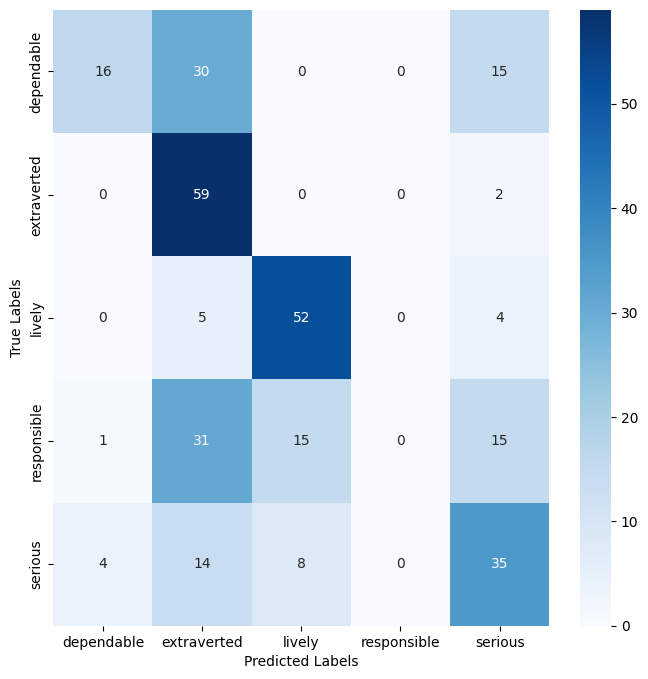

In [90]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Create the confusion matrix
# conf_mat = confusion_matrix(y_test_cat, y_pred_cat)

# # Plot the confusion matrix
# plt.figure(figsize=(8,8))
# sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
conf_mat = confusion_matrix(y_test_cat, y_pred_cat, labels=le.classes_)

# Plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [91]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_cat = np.argmax(y_pred, axis=1)

# Convert the encoded test labels back to original labels
y_test_orig = le.inverse_transform(y_test_en)

# Convert the predicted labels back to original labels
y_pred_orig = le.inverse_transform(y_pred_cat)

# Calculate precision, recall, F1-score, and accuracy
precision = precision_score(y_test_orig, y_pred_orig, average='weighted')
recall = recall_score(y_test_orig, y_pred_orig, average='weighted')
f1 = f1_score(y_test_orig, y_pred_orig, average='weighted')
accuracy = accuracy_score(y_test_orig, y_pred_orig)

# Print the evaluation metrics
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Accuracy:', accuracy)

10/10 [==============================] - 0s 1ms/step
Precision: 0.4729804989400991
Recall: 0.5294117647058824
F1-score: 0.4535634696757998
Accuracy: 0.5294117647058824


/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
from sklearn.metrics import precision_recall_fscore_support, f1_score

# Get the model's predicted labels for the test set
predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

# y_pred = model.predict_classes(X_test)

# Calculate precision, recall, and F1-score for each class
precision, recall, f1, _ = precision_recall_fscore_support(y_test_en, y_pred)

# Print precision, recall, and F1-score for each class
for i, class_name in enumerate(le.classes_):
    print(f"Metrics for {class_name}:")
    print(f"Precision: {precision[i]:.2f}")
    print(f"Recall: {recall[i]:.2f}")
    print(f"F1-score: {f1[i]:.2f}\n")

# Calculate micro-averaged precision, recall, and F1-score
micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(y_test_en, y_pred, average='micro')

# Print micro-averaged precision, recall, and F1-score
print("Micro-averaged metrics:")
print(f"Precision: {micro_precision:.2f}")
print(f"Recall: {micro_recall:.2f}")
print(f"F1-score: {micro_f1:.2f}\n")

# Calculate macro-averaged precision, recall, and F1-score
macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(y_test_en, y_pred, average='macro')

# Print macro-averaged precision, recall, and F1-score
print("Macro-averaged metrics:")
print(f"Precision: {macro_precision:.2f}")
print(f"Recall: {macro_recall:.2f}")
print(f"F1-score: {macro_f1:.2f}\n")


10/10 [==============================] - 0s 1ms/step
Metrics for dependable:
Precision: 0.76
Recall: 0.26
F1-score: 0.39

Metrics for extraverted:
Precision: 0.42
Recall: 0.97
F1-score: 0.59

Metrics for lively:
Precision: 0.69
Recall: 0.85
F1-score: 0.76

Metrics for responsible:
Precision: 0.00
Recall: 0.00
F1-score: 0.00

Metrics for serious:
Precision: 0.49
Recall: 0.57
F1-score: 0.53

Micro-averaged metrics:
Precision: 0.53
Recall: 0.53
F1-score: 0.53

Macro-averaged metrics:
Precision: 0.47
Recall: 0.53
F1-score: 0.46



/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
from sklearn.metrics import cohen_kappa_score

y_pred = model.predict(X_test).argmax(axis=-1)
kappa = cohen_kappa_score(y_test_en, y_pred)
print("Cohen's kappa:", kappa)

10/10 [==============================] - 0s 1ms/step
Cohen's kappa: 0.4122448979591836


In [94]:
from sklearn.metrics import matthews_corrcoef

y_pred = model.predict(X_test).argmax(axis=-1)
mcc = matthews_corrcoef(y_test_en, y_pred)
print("Matthews Correlation Coefficient (MCC):", mcc)

10/10 [==============================] - 0s 996us/step
Matthews Correlation Coefficient (MCC): 0.449151314421018


In [95]:
import numpy as np

k = 3  # Top-K value
y_pred = model.predict(X_test)
top_k = np.sum(np.argsort(y_pred, axis=1)[:, -k:] == y_test_en.reshape(-1, 1), axis=1)
top_k_acc = np.mean(top_k)
print(f"Top-{k} Accuracy: {top_k_acc:.2f}")

10/10 [==============================] - 0s 1ms/step
Top-3 Accuracy: 0.82


In [96]:
len(y_test_encoded)

306

In [97]:
X_test.shape

(306, 6)

In [98]:
y_test_encoded.shape

(306,)

In [99]:
X_train

,openness,extraversion,conscientiousness,Age,neuroticism,agreeableness
462,4,6,3,23,3,5
382,5,4,2,22,2,4
797,7,1,7,17,5,5
570,4,4,3,17,6,4
339,5,4,6,20,6,4
...,...,...,...,...,...,...
957,3,1,4,18,4,3
855,3,1,4,18,4,3
854,3,3,3,22,3,4
606,4,4,3,17,6,5


In [100]:
type(X_train)

pandas.core.frame.DataFrame

In [101]:
type(y_train)

pandas.core.frame.DataFrame

In [102]:
y_train['Personality'].unique()

array(['dependable', 'lively', 'extraverted', 'serious', 'responsible'],
      dtype=object)

In [103]:
714 + 306

1020

10/10 [==============================] - 0s 1ms/step


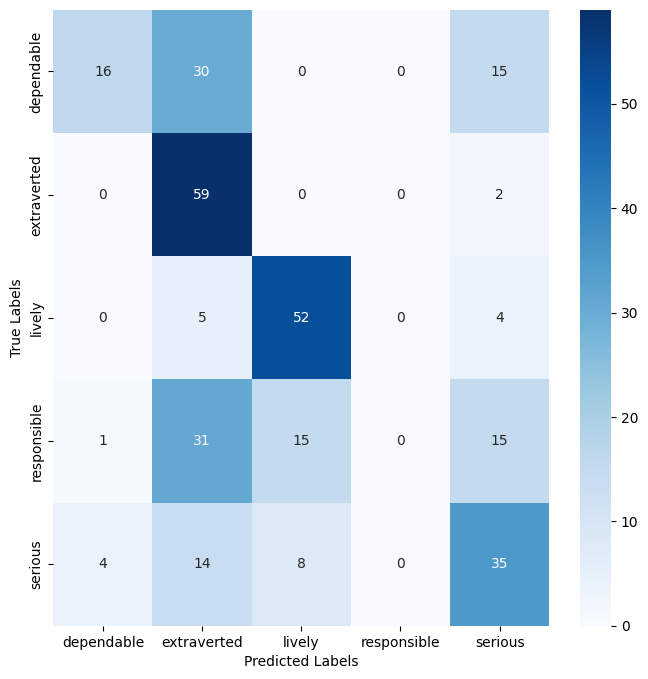

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


def classification_report_plot(X_test, y_train, y_test):
    # Create a label encoder
    le = LabelEncoder()
    #
    # Fit the label encoder on the training data
    le.fit(y_train['Personality'])
    #
    # Transform the training and test data
    y_train_en = le.transform(y_train['Personality'])
    y_test_en = le.transform(y_test['Personality']) 
    #
    # Predict labels for the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    #
    # Convert integer labels back to categorical labels
    y_test_cat = le.inverse_transform(y_test_en)
    y_pred_cat = le.inverse_transform(y_pred_classes)
    # Create the confusion matrix
    conf_mat = confusion_matrix(y_test_cat, y_pred_cat, labels=le.classes_)
    # Plot the confusion matrix
    plt.figure(figsize=(8,8))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    
classification_report_plot(X_test, y_train, y_test)

In [105]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
import numpy as np

def cprint(text, color=''):
    if color=='r':
        print("\033[91m", str(text), "\033[0m", sep='')
    elif color=='g':
        print("\033[92m", str(text), "\033[0m", sep='')
    elif color=='y':
        print("\033[93m", str(text), "\033[0m", sep='')
    elif color=='b':
        print("\033[94m", str(text), "\033[0m", sep='')
    else:
        print(str(text))


def evaluation_matrices(model, X_test, y_pred, y_test_en):
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    y_pred_cat = np.argmax(y_pred, axis=1)
    #
    # Convert the encoded test labels back to original labels
    y_test_orig = le.inverse_transform(y_test_en)
    #
    # Convert the predicted labels back to original labels
    y_pred_orig = le.inverse_transform(y_pred_cat)
    #
    # Calculate precision, recall, F1-score, and accuracy
    precision = precision_score(y_test_orig, y_pred_orig, average='weighted')
    recall = recall_score(y_test_orig, y_pred_orig, average='weighted')
    f1 = f1_score(y_test_orig, y_pred_orig, average='weighted')
    accuracy = accuracy_score(y_test_orig, y_pred_orig)
    #
    # Print the evaluation metrics
    tmp = round(precision, 1)
    text = 'Precision (0[-] to 1[+]):' + str(precision)
    if tmp > 0.5:
        cprint(text, color='g')
    elif tmp < 0.5:
        cprint(text, color='r')
    elif tmp == 0.5:
        cprint(text, color='b')
    else:
        cprint(text)
    #
    tmp = round(recall, 1)
    text = 'Recall (0[-] to 1[+]):' + str(recall)
    if tmp > 0.5:
        cprint(text, color='g')
    elif tmp < 0.5:
        cprint(text, color='r')
    elif tmp == 0.5:
        cprint(text, color='b')
    else:
        cprint(text)
    # print('Recall (0[-] to 1[+]):', recall)
    tmp = round(f1, 1)
    text = 'F1 (0[-] to 1[+]):' + str(f1)
    if tmp > 0.5:
        cprint(text, color='g')
    elif tmp < 0.5:
        cprint(text, color='r')
    elif tmp == 0.5:
        cprint(text, color='b')
    else:
        cprint(text)
    # print('F1-score (0[-] to 1[+]):', f1)
    tmp = round(accuracy, 1)
    text = 'Accuracy (0[-] to 1[+]):' + str(accuracy)
    if tmp > 0.5: 
        cprint(text, color='g')
    elif tmp < 0.5:
        cprint(text, color='r')
    elif tmp == 0.5:
        cprint(text, color='b')
    else:
        cprint(text)
    # print('Accuracy (0[-] to 1[+]):', accuracy)
    #
    # Get the model's predicted labels for the test set
    predict_x=model.predict(X_test) 
    y_pred=np.argmax(predict_x,axis=1)
    #
    # y_pred = model.predict_classes(X_test)
    #
    # Calculate precision, recall, and F1-score for each class
    precision, recall, f1, _ = precision_recall_fscore_support(y_test_en, y_pred)
    #
    # Print precision, recall, and F1-score for each class
    for i, class_name in enumerate(le.classes_):
        print(f"Metrics for {class_name}:")
        # print(f"Precision (0[-] to 1[+]): {precision[i]:.2f}")
        # print(f"Recall (0[-] to 1[+]): {recall[i]:.2f}")
        # print(f"F1-score (0[-] to 1[+]): {f1[i]:.2f}\n") 
        #
        tmp = round(precision[i], 1)
        text = f"Precision (0[-] to 1[+]): {precision[i]:.2f}"
        if tmp > 0.5: 
            cprint(text, color='g')
        elif tmp < 0.5:
            cprint(text, color='r')
        elif tmp == 0.5:
            cprint(text, color='b')
        else:
            cprint(text)      
        #    
        tmp = round(recall[i], 1)
        text = f"Recall (0[-] to 1[+]): {recall[i]:.2f}"
        if tmp > 0.5: 
            cprint(text, color='g')
        elif tmp < 0.5:
            cprint(text, color='r')
        elif tmp == 0.5:
            cprint(text, color='b')
        else:
            cprint(text)   
        #    
        tmp = round(f1[i], 1)
        text = f"F1-score (0[-] to 1[+]): {f1[i]:.2f}\n"
        if tmp > 0.5: 
            cprint(text, color='g')
        elif tmp < 0.5:
            cprint(text, color='r')
        elif tmp == 0.5:
            cprint(text, color='b')
        else:
            cprint(text)
        #
    # Calculate micro-averaged precision, recall, and F1-score
    micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(y_test_en, y_pred, average='micro')
    #
    # Print micro-averaged precision, recall, and F1-score
    print("Micro-averaged metrics:")
    text = f"Micro Precision (0[-] to 1[+]): {micro_precision:.2f}"
    #
    tmp = round(micro_precision, 1)
    if tmp > 0.5:
        cprint(text, color='g')
    elif tmp < 0.5:
        cprint(text, color='r')
    elif tmp == 0.5:
        cprint(text, color='b')
    else:
        cprint(text)     
    #    
    text = f"Micro Recall (0[-] to 1[+]): {micro_recall:.2f}"
    #
    tmp = round(micro_recall, 1)
    if tmp > 0.5:
        cprint(text, color='g')
    elif tmp < 0.5:
        cprint(text, color='r')
    elif tmp == 0.5:
        cprint(text, color='b')
    else:
        cprint(text)    
    #    
    text = f"Micro F1-score (0[-] to 1[+]): {micro_f1:.2f}\n"
    #
    tmp = round(micro_f1, 1)
    if tmp > 0.5:
        cprint(text, color='g')
    elif tmp < 0.5:
        cprint(text, color='r')
    elif tmp == 0.5:
        cprint(text, color='b')
    else:
        cprint(text)
    #    
    # print(f"Precision (0[-] to 1[+]): {micro_precision:.2f}")
    # print(f"Recall (0[-] to 1[+]): {micro_recall:.2f}")
    # print(f"F1-score (0[-] to 1[+]): {micro_f1:.2f}\n")
    #
    # Calculate macro-averaged precision, recall, and F1-score
    macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(y_test_en, y_pred, average='macro')
    #
    # Print macro-averaged precision, recall, and F1-score
    print("Macro-averaged metrics:")
    #
    text = f"Macro Precision (0[-] to 1[+]): {macro_precision:.2f}"
    #
    tmp = round(macro_precision, 1)
    if tmp > 0.5:
        cprint(text, color='g')
    elif tmp < 0.5:
        cprint(text, color='r')
    elif tmp == 0.5:
        cprint(text, color='b')
    else:
        cprint(text)
        
        
    text = f"Macro Recall (0[-] to 1[+]): {macro_recall:.2f}"

    tmp = round(macro_recall, 1)
    if tmp > 0.5:
        cprint(text, color='g')
    elif tmp < 0.5:
        cprint(text, color='r')
    elif tmp == 0.5:
        cprint(text, color='b')
    else:
        cprint(text)      
    #    
    text = f"Macro F1-score (0[-] to 1[+]): {macro_f1:.2f}\n"
    #
    tmp = round(macro_f1, 1)
    if tmp > 0.5:
        cprint(text, color='g')
    elif tmp < 0.5:
        cprint(text, color='r')
    elif tmp == 0.5:
        cprint(text, color='b')
    else:
        cprint(text)  
    # print(f"Precision (0[-] to 1[+]): {macro_precision:.2f}")
    # print(f"Recall (0[-] to 1[+]): {macro_recall:.2f}")
    # print(f"F1-score (0[-] to 1[+]): {macro_f1:.2f}\n")
    #
    y_pred = model.predict(X_test).argmax(axis=-1)
    kappa = cohen_kappa_score(y_test_en, y_pred)
    # print("Cohen's kappa (-1[-Corr] to 0[RCorr] to +1[+Corr]):", kappa)
    #
    text = "Cohen's kappa (-1[-Corr] to 0[RCorr] to +1[+Corr]):" + str(kappa)
    #
    tmp = round(kappa, 1)
    if tmp > 0:
        cprint(text, color='g')
    elif tmp < 0:
        cprint(text, color='r')
    elif tmp == 0:
        cprint(text, color='b')
    else:
        cprint(text)
    #
    y_pred = model.predict(X_test).argmax(axis=-1)
    mcc = matthews_corrcoef(y_test_en, y_pred)
    # print("Matthews Correlation Coefficient (MCC) (-1[-Corr] to 0[RCorr] to +1[+Corr]):", mcc)
    #
    text = "Matthews Correlation Coefficient (MCC) (-1[-Corr] to 0[RCorr] to +1[+Corr]):" + str(mcc)
    #
    tmp = round(mcc, 1)
    if tmp > 0:
        cprint(text, color='g')
    elif tmp < 0:
        cprint(text, color='r')
    elif tmp == 0:
        cprint(text, color='b')
    else:
        cprint(text)
    #
    k = 3  # Top-K value
    y_pred = model.predict(X_test)
    top_k = np.sum(np.argsort(y_pred, axis=1)[:, -k:] == y_test_en.reshape(-1, 1), axis=1)
    top_k_acc = np.mean(top_k)
    # print(f"Top-{k} Accuracy (0[-] to 1[+]): {top_k_acc:.2f}")
    
    text = f"Top-{k} Accuracy (0[-] to 1[+]): {top_k_acc:.2f}"
    tmp = round(top_k_acc, 1)
    if tmp > 0:
        cprint(text, color='g')
    elif tmp < 0:
        cprint(text, color='r')
    elif tmp == 0:
        cprint(text, color='b')
    else:
        cprint(text)
    


evaluation_matrices(model, X_test, y_pred, y_test_en)

10/10 [==============================] - 0s 1ms/step
Precision (0[-] to 1[+]):0.4729804989400991
Recall (0[-] to 1[+]):0.5294117647058824
F1 (0[-] to 1[+]):0.4535634696757998
Accuracy (0[-] to 1[+]):0.5294117647058824
10/10 [==============================] - 0s 1ms/step
Metrics for dependable:
Precision (0[-] to 1[+]): 0.76
Recall (0[-] to 1[+]): 0.26
F1-score (0[-] to 1[+]): 0.39

Metrics for extraverted:
Precision (0[-] to 1[+]): 0.42
Recall (0[-] to 1[+]): 0.97
F1-score (0[-] to 1[+]): 0.59

Metrics for lively:
Precision (0[-] to 1[+]): 0.69
Recall (0[-] to 1[+]): 0.85
F1-score (0[-] to 1[+]): 0.76

Metrics for responsible:
Precision (0[-] to 1[+]): 0.00
Recall (0[-] to 1[+]): 0.00
F1-score (0[-] to 1[+]): 0.00

Metrics for serious:
Precision (0[-] to 1[+]): 0.49
Recall (0[-] to 1[+]): 0.57
F1-score (0[-] to 1[+]): 0.53

Micro-averaged metrics:
Micro Precision (0[-] to 1[+]): 0.53
Micro Recall (0[-] to 1[+]): 0.53
Micro F1-score (0[-] to 1[+]): 0.53

Macro-averaged metrics:
Macro Pr

/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi

10/10 [==============================] - 0s 1ms/step
Matthews Correlation Coefficient (MCC) (-1[-Corr] to 0[RCorr] to +1[+Corr]):0.449151314421018
10/10 [==============================] - 0s 979us/step
Top-3 Accuracy (0[-] to 1[+]): 0.82


In [106]:
print("\033[91m" + "Red text" + "\033[0m")

def cprint(text, color=''):
    if color=='r':
        print("\033[91m", str(text), "\033[0m", sep='')
    elif color=='g':
        print("\033[92m", str(text), "\033[0m", sep='')
    elif color=='y':
        print("\033[93m", str(text), "\033[0m", sep='')
    elif color=='b':
        print("\033[94m", str(text), "\033[0m", sep='')
    else:
        print(str(text))
cprint(123, 'r')
cprint(123, 'g')
cprint(123, 'y')
cprint(123, 'b')
cprint(123)

my_float = 3.14159
rounded_float = round(my_float, 1)
print(rounded_float)


Red text
123
123
123
123
123
3.1


In [107]:
# In this example, \033[91m sets the color to red, and \033[0m resets the color back to the default.

# Here are some of the most commonly %set_enved color codes:

# Red: \033[91m
# Green: \033[92m
# Yellow: \033[93m
# Blue: \033[94m
# Purple: \033[95m
# Cyan: \033[96m
# You can also change the background color by using the following codes:

# Red: \033[101m
# Green: \033[102m
# Yellow: \033[103m
# Blue: \033[104m
# Purple: \033[105m
# Cyan: \033[106m
# To reset the color back to the default, use \033[0m.

# Note that not all terminal emulators support ANSI escape codes, so this method may not work on all systems.

In [108]:
f"Precision (0[-] to 1[+]): {1.256:.2f}"

'Precision (0[-] to 1[+]): 1.26'

In [109]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
le = LabelEncoder()

# Fit the label encoder on the training data
le.fit(y_train['Personality'])

# Transform the training and test data
y_train_en = le.transform(y_train['Personality'])
y_test_en = le.transform(y_test['Personality'])


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(y_train['Personality'].unique()))
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

#
# Fit the model to the training data
history = model.fit(
    X_train,
    y_train_en,
    epochs=10,
    validation_split=0.2
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_en)
print(f'Test accuracy: {test_acc}')


Epoch 1/10
18/18 [==============================] - 1s 18ms/step - loss: 1.9025 - accuracy: 0.2785 - val_loss: 1.5331 - val_accuracy: 0.3566
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 1.4717 - accuracy: 0.4221 - val_loss: 1.4179 - val_accuracy: 0.3077
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 1.3577 - accuracy: 0.4256 - val_loss: 1.3893 - val_accuracy: 0.3427
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 1.2745 - accuracy: 0.4781 - val_loss: 1.2635 - val_accuracy: 0.5035
Epoch 5/10
18/18 [==============================] - 0s 4ms/step - loss: 1.2357 - accuracy: 0.4956 - val_loss: 1.3035 - val_accuracy: 0.3986
Epoch 6/10
18/18 [==============================] - 0s 4ms/step - loss: 1.2160 - accuracy: 0.5201 - val_loss: 1.2816 - val_accuracy: 0.3916
Epoch 7/10
18/18 [==============================] - 0s 3ms/step - loss: 1.1851 - accuracy: 0.5219 - val_loss: 1.1898 - val_accuracy: 0.5455
Epoch 8/10
18/18 [=

10/10 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

  dependable       0.82      0.15      0.25        61
 extraverted       0.55      0.95      0.69        61
      lively       0.81      0.75      0.78        61
 responsible       1.00      0.02      0.03        62
     serious       0.41      0.89      0.56        61

    accuracy                           0.55       306
   macro avg       0.72      0.55      0.46       306
weighted avg       0.72      0.55      0.46       306



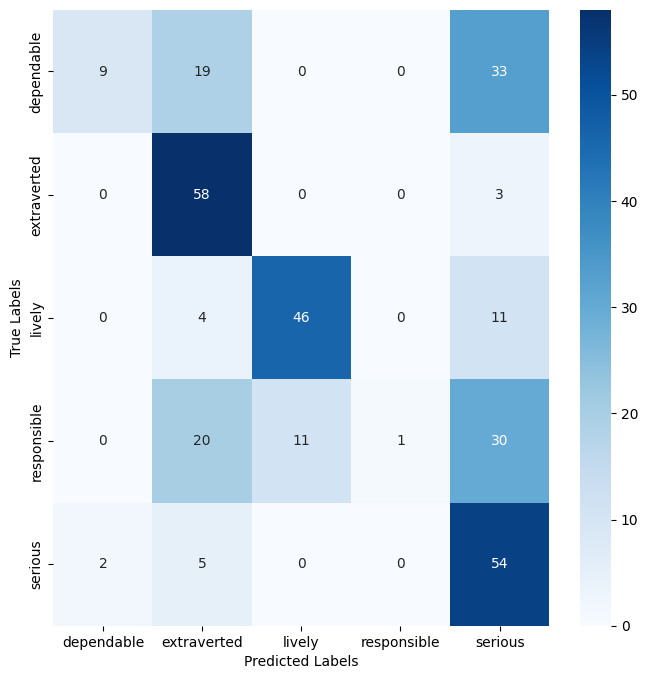

10/10 [==============================] - 0s 1ms/step
Precision (0[-] to 1[+]):0.717841691970701
Recall (0[-] to 1[+]):0.5490196078431373
F1 (0[-] to 1[+]):0.46229193950059544
Accuracy (0[-] to 1[+]):0.5490196078431373
10/10 [==============================] - 0s 1ms/step
Metrics for dependable:
Precision (0[-] to 1[+]): 0.82
Recall (0[-] to 1[+]): 0.15
F1-score (0[-] to 1[+]): 0.25

Metrics for extraverted:
Precision (0[-] to 1[+]): 0.55
Recall (0[-] to 1[+]): 0.95
F1-score (0[-] to 1[+]): 0.69

Metrics for lively:
Precision (0[-] to 1[+]): 0.81
Recall (0[-] to 1[+]): 0.75
F1-score (0[-] to 1[+]): 0.78

Metrics for responsible:
Precision (0[-] to 1[+]): 1.00
Recall (0[-] to 1[+]): 0.02
F1-score (0[-] to 1[+]): 0.03

Metrics for serious:
Precision (0[-] to 1[+]): 0.41
Recall (0[-] to 1[+]): 0.89
F1-score (0[-] to 1[+]): 0.56

Micro-averaged metrics:
Micro Precision (0[-] to 1[+]): 0.55
Micro Recall (0[-] to 1[+]): 0.55
Micro F1-score (0[-] to 1[+]): 0.55

Macro-averaged metrics:
Macro Pr

In [110]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert integer labels back to categorical labels
y_test_cat = le.inverse_transform(y_test_en)
y_pred_cat = le.inverse_transform(y_pred_classes)

print('Classification Report:')
print(classification_report(y_test_cat, y_pred_cat))


import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
conf_mat = confusion_matrix(y_test_cat, y_pred_cat, labels=le.classes_)

# Plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

evaluation_matrices(model, X_test, y_pred, y_test_en)

In [111]:
# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(y_train['Personality'].unique()))
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

#
# Fit the model to the training data
history = model.fit(
    X_train,
    y_train_en,
    epochs=10,
    validation_split=0.2
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_en)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
18/18 [==============================] - 1s 15ms/step - loss: 1.6376 - accuracy: 0.2785 - val_loss: 1.4853 - val_accuracy: 0.3916
Epoch 2/10
18/18 [==============================] - 0s 4ms/step - loss: 1.4164 - accuracy: 0.3923 - val_loss: 1.4370 - val_accuracy: 0.3636
Epoch 3/10
18/18 [==============================] - 0s 4ms/step - loss: 1.3411 - accuracy: 0.4221 - val_loss: 1.2582 - val_accuracy: 0.5175
Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 1.2592 - accuracy: 0.4746 - val_loss: 1.2911 - val_accuracy: 0.4685
Epoch 5/10
18/18 [==============================] - 0s 4ms/step - loss: 1.2201 - accuracy: 0.4921 - val_loss: 1.4416 - val_accuracy: 0.3636
Epoch 6/10
18/18 [==============================] - 0s 4ms/step - loss: 1.1557 - accuracy: 0.5464 - val_loss: 1.3508 - val_accuracy: 0.3287
Epoch 7/10
18/18 [==============================] - 0s 4ms/step - loss: 1.1575 - accuracy: 0.5166 - val_loss: 1.1049 - val_accuracy: 0.5874
Epoch 8/10
18/18 [=

10/10 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

  dependable       0.61      0.44      0.51        61
 extraverted       0.62      0.84      0.71        61
      lively       0.75      0.85      0.80        61
 responsible       0.50      0.02      0.03        62
     serious       0.46      0.82      0.59        61

    accuracy                           0.59       306
   macro avg       0.59      0.59      0.53       306
weighted avg       0.59      0.59      0.53       306



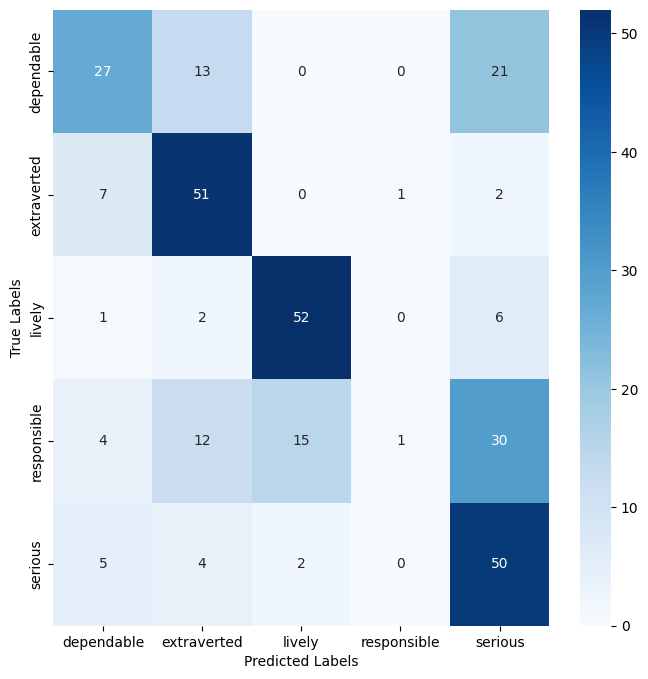

10/10 [==============================] - 0s 1ms/step
Precision (0[-] to 1[+]):0.5892925112449755
Recall (0[-] to 1[+]):0.5915032679738562
F1 (0[-] to 1[+]):0.5277835654349496
Accuracy (0[-] to 1[+]):0.5915032679738562
10/10 [==============================] - 0s 1ms/step
Metrics for dependable:
Precision (0[-] to 1[+]): 0.61
Recall (0[-] to 1[+]): 0.44
F1-score (0[-] to 1[+]): 0.51

Metrics for extraverted:
Precision (0[-] to 1[+]): 0.62
Recall (0[-] to 1[+]): 0.84
F1-score (0[-] to 1[+]): 0.71

Metrics for lively:
Precision (0[-] to 1[+]): 0.75
Recall (0[-] to 1[+]): 0.85
F1-score (0[-] to 1[+]): 0.80

Metrics for responsible:
Precision (0[-] to 1[+]): 0.50
Recall (0[-] to 1[+]): 0.02
F1-score (0[-] to 1[+]): 0.03

Metrics for serious:
Precision (0[-] to 1[+]): 0.46
Recall (0[-] to 1[+]): 0.82
F1-score (0[-] to 1[+]): 0.59

Micro-averaged metrics:
Micro Precision (0[-] to 1[+]): 0.59
Micro Recall (0[-] to 1[+]): 0.59
Micro F1-score (0[-] to 1[+]): 0.59

Macro-averaged metrics:
Macro Pr

In [112]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert integer labels back to categorical labels
y_test_cat = le.inverse_transform(y_test_en)
y_pred_cat = le.inverse_transform(y_pred_classes)

print('Classification Report:')
print(classification_report(y_test_cat, y_pred_cat))


import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
conf_mat = confusion_matrix(y_test_cat, y_pred_cat, labels=le.classes_)

# Plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

evaluation_matrices(model, X_test, y_pred, y_test_en)

In [113]:
# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(y_train['Personality'].unique()))
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

#
# Fit the model to the training data
history = model.fit(
    X_train,
    y_train_en,
    epochs=50,
    validation_split=0.2, 
    verbose=0,
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_en)
print(f'Test accuracy: {test_acc}')

10/10 [==============================] - 0s 2ms/step - loss: 0.3566 - accuracy: 0.8791
Test accuracy: 0.8790849447250366


10/10 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

  dependable       0.84      0.93      0.88        61
 extraverted       0.77      0.97      0.86        61
      lively       0.96      0.90      0.93        61
 responsible       0.92      0.76      0.83        62
     serious       0.96      0.84      0.89        61

    accuracy                           0.88       306
   macro avg       0.89      0.88      0.88       306
weighted avg       0.89      0.88      0.88       306



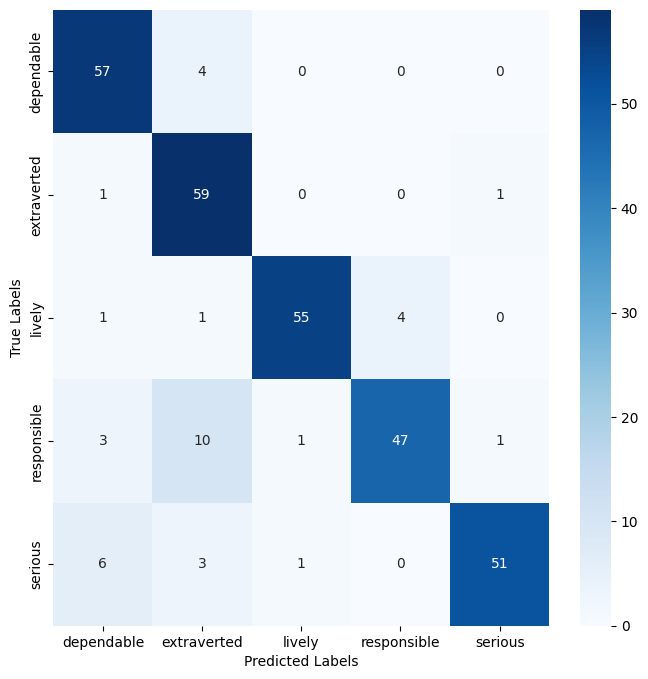

10/10 [==============================] - 0s 1ms/step
Precision (0[-] to 1[+]):0.8907438886070299
Recall (0[-] to 1[+]):0.8790849673202614
F1 (0[-] to 1[+]):0.8793626549707884
Accuracy (0[-] to 1[+]):0.8790849673202614
10/10 [==============================] - 0s 1ms/step
Metrics for dependable:
Precision (0[-] to 1[+]): 0.84
Recall (0[-] to 1[+]): 0.93
F1-score (0[-] to 1[+]): 0.88

Metrics for extraverted:
Precision (0[-] to 1[+]): 0.77
Recall (0[-] to 1[+]): 0.97
F1-score (0[-] to 1[+]): 0.86

Metrics for lively:
Precision (0[-] to 1[+]): 0.96
Recall (0[-] to 1[+]): 0.90
F1-score (0[-] to 1[+]): 0.93

Metrics for responsible:
Precision (0[-] to 1[+]): 0.92
Recall (0[-] to 1[+]): 0.76
F1-score (0[-] to 1[+]): 0.83

Metrics for serious:
Precision (0[-] to 1[+]): 0.96
Recall (0[-] to 1[+]): 0.84
F1-score (0[-] to 1[+]): 0.89

Micro-averaged metrics:
Micro Precision (0[-] to 1[+]): 0.88
Micro Recall (0[-] to 1[+]): 0.88
Micro F1-score (0[-] to 1[+]): 0.88

Macro-averaged metrics:
Macro Pr

In [114]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert integer labels back to categorical labels
y_test_cat = le.inverse_transform(y_test_en)
y_pred_cat = le.inverse_transform(y_pred_classes)

print('Classification Report:')
print(classification_report(y_test_cat, y_pred_cat))


import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
conf_mat = confusion_matrix(y_test_cat, y_pred_cat, labels=le.classes_)

# Plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

evaluation_matrices(model, X_test, y_pred, y_test_en)

In [115]:
# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(300, activation='relu'),
    layers.Dense(300, activation='relu'),
    # layers.Dense(64, activation='relu'),
    # layers.Dense(64, activation='relu'),
    layers.Dense(len(y_train['Personality'].unique()))
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

#
# Fit the model to the training data
history = model.fit(
    X_train,
    y_train_en,
    epochs=10,
    validation_split=0.2, 
    verbose=0,
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_en)
print(f'Test accuracy: {test_acc}')

10/10 [==============================] - 0s 2ms/step - loss: 0.9108 - accuracy: 0.6373
Test accuracy: 0.6372548937797546


10/10 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

  dependable       0.55      0.69      0.61        61
 extraverted       0.45      0.90      0.60        61
      lively       0.98      0.75      0.85        61
 responsible       0.76      0.35      0.48        62
     serious       0.94      0.49      0.65        61

    accuracy                           0.64       306
   macro avg       0.73      0.64      0.64       306
weighted avg       0.74      0.64      0.64       306



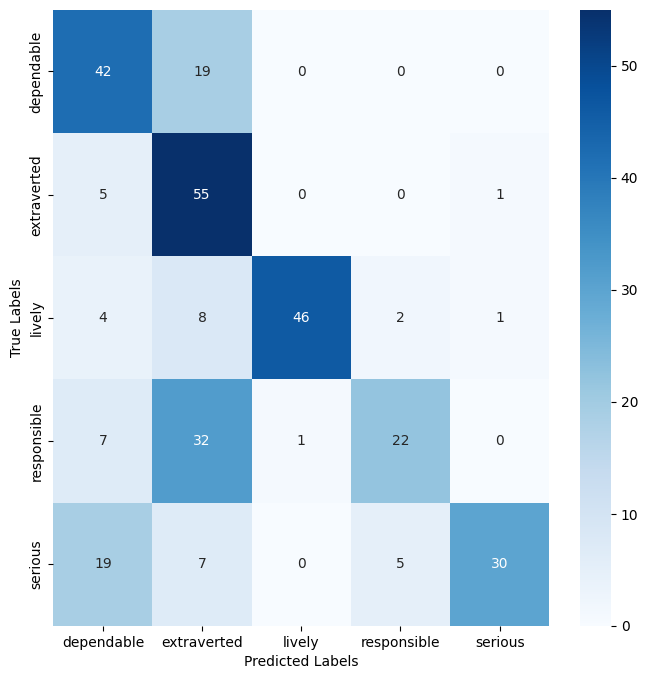

10/10 [==============================] - 0s 2ms/step
Precision (0[-] to 1[+]):0.735046112477762
Recall (0[-] to 1[+]):0.6372549019607843
F1 (0[-] to 1[+]):0.6382169617692907
Accuracy (0[-] to 1[+]):0.6372549019607843
10/10 [==============================] - 0s 1ms/step
Metrics for dependable:
Precision (0[-] to 1[+]): 0.55
Recall (0[-] to 1[+]): 0.69
F1-score (0[-] to 1[+]): 0.61

Metrics for extraverted:
Precision (0[-] to 1[+]): 0.45
Recall (0[-] to 1[+]): 0.90
F1-score (0[-] to 1[+]): 0.60

Metrics for lively:
Precision (0[-] to 1[+]): 0.98
Recall (0[-] to 1[+]): 0.75
F1-score (0[-] to 1[+]): 0.85

Metrics for responsible:
Precision (0[-] to 1[+]): 0.76
Recall (0[-] to 1[+]): 0.35
F1-score (0[-] to 1[+]): 0.48

Metrics for serious:
Precision (0[-] to 1[+]): 0.94
Recall (0[-] to 1[+]): 0.49
F1-score (0[-] to 1[+]): 0.65

Micro-averaged metrics:
Micro Precision (0[-] to 1[+]): 0.64
Micro Recall (0[-] to 1[+]): 0.64
Micro F1-score (0[-] to 1[+]): 0.64

Macro-averaged metrics:
Macro Pre

In [116]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert integer labels back to categorical labels
y_test_cat = le.inverse_transform(y_test_en)
y_pred_cat = le.inverse_transform(y_pred_classes)

print('Classification Report:')
print(classification_report(y_test_cat, y_pred_cat))


import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
conf_mat = confusion_matrix(y_test_cat, y_pred_cat, labels=le.classes_)

# Plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

evaluation_matrices(model, X_test, y_pred, y_test_en)

In [117]:
# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(300, activation='relu'),
    layers.Dense(300, activation='relu'),
    # layers.Dense(64, activation='relu'),
    # layers.Dense(64, activation='relu'),
    layers.Dense(len(y_train['Personality'].unique()))
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

#
# Fit the model to the training data
history = model.fit(
    X_train,
    y_train_en,
    epochs=50,
    validation_split=0.2, 
    verbose=0,
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_en)
print(f'Test accuracy: {test_acc}')

10/10 [==============================] - 0s 2ms/step - loss: 0.4668 - accuracy: 0.8105
Test accuracy: 0.8104575276374817


10/10 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

  dependable       0.94      0.77      0.85        61
 extraverted       0.65      0.98      0.78        61
      lively       1.00      0.75      0.86        61
 responsible       0.81      0.81      0.81        62
     serious       0.82      0.74      0.78        61

    accuracy                           0.81       306
   macro avg       0.84      0.81      0.81       306
weighted avg       0.84      0.81      0.81       306



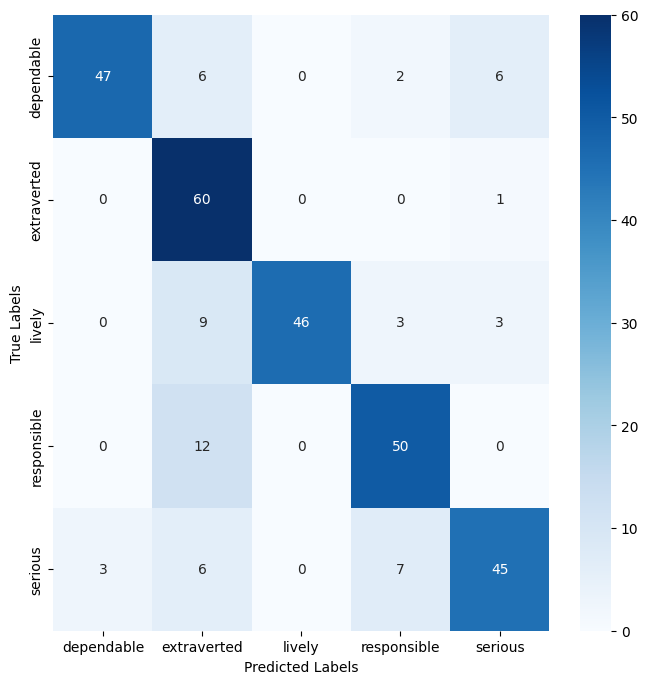

10/10 [==============================] - 0s 2ms/step
Precision (0[-] to 1[+]):0.841842907250877
Recall (0[-] to 1[+]):0.8104575163398693
F1 (0[-] to 1[+]):0.8136153906139308
Accuracy (0[-] to 1[+]):0.8104575163398693
10/10 [==============================] - 0s 1ms/step
Metrics for dependable:
Precision (0[-] to 1[+]): 0.94
Recall (0[-] to 1[+]): 0.77
F1-score (0[-] to 1[+]): 0.85

Metrics for extraverted:
Precision (0[-] to 1[+]): 0.65
Recall (0[-] to 1[+]): 0.98
F1-score (0[-] to 1[+]): 0.78

Metrics for lively:
Precision (0[-] to 1[+]): 1.00
Recall (0[-] to 1[+]): 0.75
F1-score (0[-] to 1[+]): 0.86

Metrics for responsible:
Precision (0[-] to 1[+]): 0.81
Recall (0[-] to 1[+]): 0.81
F1-score (0[-] to 1[+]): 0.81

Metrics for serious:
Precision (0[-] to 1[+]): 0.82
Recall (0[-] to 1[+]): 0.74
F1-score (0[-] to 1[+]): 0.78

Micro-averaged metrics:
Micro Precision (0[-] to 1[+]): 0.81
Micro Recall (0[-] to 1[+]): 0.81
Micro F1-score (0[-] to 1[+]): 0.81

Macro-averaged metrics:
Macro Pre

In [118]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert integer labels back to categorical labels
y_test_cat = le.inverse_transform(y_test_en)
y_pred_cat = le.inverse_transform(y_pred_classes)

print('Classification Report:')
print(classification_report(y_test_cat, y_pred_cat))


import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
conf_mat = confusion_matrix(y_test_cat, y_pred_cat, labels=le.classes_)

# Plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

evaluation_matrices(model, X_test, y_pred, y_test_en)